In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
filepath = "./GEO Samples/Ov_merged_data_with_metadata.csv"
ov_samples = pd.read_csv(filepath)


In [3]:
# Drop ID and lable column
x = ov_samples.drop(['ID', 'Stage'], axis=1, inplace=False)
y = ov_samples[['Stage']]
y['Stage'].value_counts()

Stage
3    331
1    265
2     72
4     32
Name: count, dtype: int64

In [4]:
# Undersampling with RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)

# Perform undersampling
X_resampled, y_resampled = cc.fit_resample(x, y["Stage"])

# Convert y_resampled back to a DataFrame
y_resampled = y_resampled.to_frame(name="Stage")

# Display resampled class distribution
y_resampled['Stage'].value_counts()

C:\Users\aisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aisa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Stage
1    32
2    32
3    32
4    32
Name: count, dtype: int64

In [6]:
# Shuffle the oversampled training data
shuffled = X_resampled.join(y_resampled).sample(frac=1, random_state=42).reset_index(drop=True)
x = shuffled.drop(columns='Stage')
y = shuffled['Stage']

In [10]:
X_train

,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
35,68,59.970723,66.469719,60.923159,81.803594,62.775621,105.588052,63.855759,64.522425,68.896906,...,59.050352,89.635924,92.346628,62.540221,63.888332,86.180965,62.124498,83.104141,76.443042,65.393533
94,74,56.690573,60.500663,55.328283,75.600992,53.508600,66.214300,63.234250,60.194255,190.754489,...,53.948367,73.357817,76.983232,54.794000,55.127334,69.860053,55.868272,67.247907,65.417573,58.072814
113,49,53.719144,57.016895,55.823957,57.483116,57.694400,56.281557,54.719144,55.869269,57.140608,...,50.311591,58.940994,57.695232,52.340775,53.260989,56.202048,51.724710,55.790315,55.253759,55.507306
62,52,57.303140,59.962368,56.583396,62.918482,58.748338,60.301188,59.141365,55.334047,58.125388,...,55.111533,63.091992,66.583904,56.473652,55.840890,62.518923,53.698994,67.002268,58.887236,61.495793
14,40,49.869326,50.596737,53.429290,53.915722,50.766180,50.930070,53.944855,52.397999,55.266159,...,55.896899,57.862050,57.637417,56.444074,55.201099,58.201697,57.099792,59.285261,60.086523,56.961797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,59,67.264802,68.483008,65.751743,82.453158,68.287283,68.577583,65.082136,65.179746,75.456289,...,59.796992,76.957711,83.401522,58.875566,62.467105,78.467229,58.597315,73.178037,69.271789,62.170324
41,55,61.173972,62.294044,61.347397,70.038162,60.516892,65.178077,62.345152,61.377129,93.018413,...,57.936601,69.121870,73.200451,57.522765,60.119097,69.033833,59.177475,66.673112,64.922946,62.700867
13,72,58.497428,57.246268,58.305625,69.643022,62.065164,67.834653,57.737773,58.322383,65.187455,...,59.781065,71.702783,77.775378,54.232972,59.160517,74.082582,58.005172,63.728657,67.342801,56.912877
17,63,59.327583,59.995938,59.245924,65.366035,58.496779,63.243981,58.863640,58.562811,69.667228,...,54.807494,65.690897,66.953691,54.477548,55.646254,66.551120,54.043278,60.341080,60.651450,58.288962


In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=20)


In [ ]:
# # Oversample rows where y == 4

# # Stage 4 originally has 32 samples. We repute each one 8 times = 288
# n = 8
# mask = y_train['Stage'] == 4

# X_Stage_4 = X_train[mask]
# y_Stage_4 = y_train[mask]
# y_Stage_4

# X_train_oversampled = pd.concat([X_train, pd.concat([X_Stage_4]*n)], ignore_index=True)
# y_train_oversampled = pd.concat([y_train, pd.concat([y_Stage_4]*n)], ignore_index=True)


# # Oversample rows where y == 2
# # Stage 2 originally has 72 samples. We repute each one 3 times = 288
# n = 3
# mask = y_train["Stage"] == 2

# X_Stage_2 = X_train[mask]
# y_Stage_2 = y_train[mask]

# X_train_oversampled = pd.concat([X_train_oversampled, pd.concat([X_Stage_2]*n)], ignore_index=True)
# y_train_oversampled = pd.concat([y_train_oversampled, pd.concat([y_Stage_2]*n)], ignore_index=True)

# y_train_oversampled['Stage'].value_counts()

In [ ]:
# # Over Sampling with Smote

# from imblearn.over_sampling import BorderlineSMOTE

# # Apply Borderline-SMOTE
# smote = BorderlineSMOTE(random_state=42)
# X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# y_train_oversampled['Stage'].value_counts()

In [ ]:
# Shuffle the oversampled training data
shuffled = X_resampled.join(y_resampled).sample(frac=1, random_state=42).reset_index(drop=True)
X_train = shuffled.drop(columns='Stage')
y_train = shuffled['Stage']

In [ ]:
# print("Train min:", X_train.min().min())
# print("Train max:", X_train.max().max())
# print("Test min:", X_test.min().min())
# print("Test max:", X_test.max().max())

In [11]:
# Normalization with Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
normalized_train_samples = pd.DataFrame(X_train_scaled, columns= x.columns)
normalized_test_samples = pd.DataFrame(X_test_scaled, columns= x.columns)

In [13]:
X_train = normalized_train_samples.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [14]:
# # Concate normalized data and lables:
# train_normalized = pd.concat([y_train, X_train], axis=1)

# filepath = "./GEO Samples/train_data_stage_classification.csv"
# train_normalized.to_csv(filepath, index=False)

# train_normalized

In [15]:
X_test = normalized_test_samples.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
# # Concate normalized Test data and lables 

# test_data = pd.concat([y_test, X_test ], axis=1)

# filepath = "./GEO Samples/test_data_stage_classification.csv.csv"
# test_data.to_csv(filepath, index=False)

# test_data

In [16]:
# Train Random Forest on full data and get feature importances
from sklearn.ensemble import RandomForestClassifier
import numpy as np

x = X_train
y = y_train
k = 200
# Train a model
model = RandomForestClassifier(n_estimators=k, random_state=42, class_weight='balanced')
model.fit(x, y)

# Get feature importances and select top k
RF_importances = model.feature_importances_
indices = np.argsort(RF_importances)[::-1]  # Sort descending


top_indices = indices[:k]


In [17]:
top_indices.shape

(200,)

In [18]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
x_mi_selected = mi_selector.fit_transform(x, y)

# Get the actual indices of selected features
mi_indices = mi_selector.get_support(indices=True)
mi_indices

array([  26,   30,   41,   56,   82,  133,  138,  140,  195,  202,  218,
        223,  271,  274,  287,  308,  310,  312,  346,  353,  437,  440,
        445,  453,  454,  461,  470,  500,  526,  538,  544,  547,  575,
        578,  585,  599,  600,  619,  636,  676,  685,  710,  731,  745,
        746,  759,  767,  772,  782,  809,  812,  834,  859,  882,  903,
        911,  914,  933,  941,  949,  969,  982,  995, 1000, 1009, 1014,
       1035, 1036, 1041, 1068, 1098, 1134, 1140, 1146, 1150, 1160, 1162,
       1164, 1176, 1179, 1183, 1195, 1215, 1223, 1234, 1235, 1256, 1258,
       1296, 1304, 1314, 1316, 1318, 1332, 1345, 1346, 1367, 1379, 1398,
       1402, 1404, 1406, 1413, 1420, 1456, 1460, 1473, 1480, 1507, 1528,
       1536, 1545, 1556, 1558, 1592, 1593, 1599, 1619, 1624, 1632, 1653,
       1662, 1663, 1664, 1670, 1674, 1706, 1712, 1728, 1733, 1736, 1737,
       1751, 1786, 1790, 1810, 1815, 1834, 1873, 1874, 1889, 1900, 1904,
       1905, 1906, 1943, 1946, 1960, 1974, 1975, 19

In [19]:
# Get top k feature indices by model importance
top_k_model_indices = np.argsort(RF_importances)[::-1][:k]

# Compare overlap
indices = set(mi_indices) & set(top_k_model_indices)
print(f"Overlap count: {len(indices)} out of {k}")
print(f"Overlap indices: {sorted(indices)}")


Overlap count: 33 out of 200
Overlap indices: [138, 195, 202, 223, 274, 287, 308, 310, 578, 599, 782, 1150, 1258, 1318, 1473, 1556, 1737, 1751, 1815, 1873, 1874, 1889, 1946, 1960, 1975, 1985, 2065, 2227, 2327, 2371, 2386, 2409, 2479]


In [ ]:
# # Convert to sorted list (optional, for ordered output)
# overlap_sorted = sorted(overlap)

# # Get corresponding feature names
# overlap_feature_names = x.columns[overlap_sorted]

# # Display or use them
# print(overlap_feature_names)

In [ ]:
# from collections import OrderedDict
# indices = list(set(top_indices).union(set(mi_indices)))
# len(combined)

In [20]:
x_train = x.iloc[:, sorted(indices)]
x_train

,MIMAT0018986,MIMAT0019026,MIMAT0021043,MIMAT0027539,MIMAT0014989,MIMAT0019848,MIMAT0022694,MIMAT0027620,MIMAT0007399,MIMAT0019810,...,MIMAT0018976,MIMAT0020957,MIMAT0025478,MIMAT0027690,MIMAT0027654,MIMAT0003276,MIMAT0019855,MIMAT0027650,MIMAT0003319,MIMAT0000269
0,0.259873,0.631070,0.082249,0.859453,0.519133,0.678084,0.456954,0.042209,0.552514,0.068547,...,0.218208,0.520310,0.327233,0.244223,0.212508,0.759640,0.037058,0.228890,0.136641,0.541232
1,0.193987,0.163442,0.039184,0.435420,0.439358,0.516557,0.136512,0.021927,0.198345,0.141053,...,0.420875,0.194241,0.166621,0.157160,0.141330,0.358347,0.075255,0.058439,1.000000,0.430763
2,0.070908,0.149089,0.023954,0.162547,0.113011,0.080394,0.083246,0.011043,0.089305,0.005042,...,0.019571,0.191441,0.054050,0.022735,0.018768,0.149326,0.004913,0.024987,0.026797,0.098921
3,0.150243,0.127393,0.021921,0.205993,0.263948,0.374055,0.101763,0.010516,0.201556,0.045281,...,0.093122,0.382761,0.150224,0.057005,0.170859,0.213378,0.030186,0.025079,0.107532,0.372594
4,0.000000,0.024471,0.000000,0.065750,0.000000,0.000000,0.090686,0.003141,0.000000,0.000000,...,0.081050,0.101070,0.024773,0.026749,0.014433,0.144012,0.001246,0.035909,0.021739,0.088261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.325955,1.000000,0.087320,0.719414,0.627637,0.472054,0.199553,0.023119,0.216675,0.046064,...,0.136661,0.572185,0.201535,0.174672,0.169002,0.530898,0.021335,0.037981,0.086872,0.456874
98,0.180023,0.455682,0.043133,0.394216,0.551699,0.446904,0.146231,0.017439,0.324721,0.085496,...,0.186630,0.349463,0.181307,0.159793,0.111170,0.432041,0.031527,0.043226,0.082467,0.385454
99,0.186476,0.477177,0.072779,0.370575,0.351843,0.424341,0.252663,0.026652,0.308970,0.059596,...,0.280053,0.334399,0.289899,0.187096,0.122085,0.465298,0.013422,0.106086,0.052046,0.215650
100,0.150494,0.386952,0.035403,0.271487,0.350219,0.350817,0.213643,0.020341,0.271339,0.060522,...,0.070186,0.291570,0.162478,0.107386,0.085656,0.314526,0.010709,0.074753,0.042503,0.352536


In [21]:
x_test = X_test.iloc[:, sorted(indices)]
x_test

,MIMAT0018986,MIMAT0019026,MIMAT0021043,MIMAT0027539,MIMAT0014989,MIMAT0019848,MIMAT0022694,MIMAT0027620,MIMAT0007399,MIMAT0019810,...,MIMAT0018976,MIMAT0020957,MIMAT0025478,MIMAT0027690,MIMAT0027654,MIMAT0003276,MIMAT0019855,MIMAT0027650,MIMAT0003319,MIMAT0000269
0,0.222752,0.449159,0.067592,0.562096,0.693067,0.495531,0.349580,0.043314,0.363752,0.069305,...,0.284061,0.252724,0.585699,0.361475,0.161691,0.516069,0.034825,0.256106,0.078314,0.494074
1,0.237793,0.469717,0.076076,0.436125,0.512848,0.468111,0.307719,0.027650,0.280080,0.030670,...,0.121225,0.382509,0.248381,0.196848,0.106696,0.493082,0.019864,0.070160,0.052926,0.274151
2,0.170345,0.449515,0.044105,0.463135,0.477602,0.389836,0.215713,0.018163,0.341537,0.107355,...,0.115472,0.412599,0.212904,0.150420,0.124134,0.443325,0.022524,0.062826,0.084159,0.394025
3,0.196451,0.435739,0.150448,0.453679,0.494415,0.459873,0.272964,0.026837,0.316496,0.132209,...,0.244186,0.416960,0.339026,0.228872,0.154784,0.440764,0.042428,0.100887,0.091779,0.479925
4,0.272372,0.515353,0.068538,0.523272,0.638451,0.732222,0.253404,0.026671,0.357518,0.204173,...,0.332199,0.286792,0.231977,0.232812,0.191228,0.593059,0.103587,0.104500,0.143536,0.341623
5,0.107238,0.340193,0.031186,0.431525,0.420709,0.396595,0.125722,0.015871,0.173847,0.081518,...,0.206130,0.295432,0.157438,0.165493,0.092762,0.307467,0.045735,0.060082,0.041231,0.161381
6,0.152373,0.308298,0.034916,0.224126,0.394218,0.295542,0.182120,0.014383,0.221283,0.061993,...,0.057347,0.245297,0.132808,0.109053,0.075320,0.258108,0.011238,0.044010,0.047182,0.112705
7,0.198570,0.528123,0.063980,0.535171,0.609803,0.509031,0.419902,0.036489,0.454310,0.070137,...,0.237208,0.346360,0.341217,0.223388,0.191703,0.587455,0.028325,0.209342,0.101441,0.478561
8,0.269649,0.509339,0.099594,0.769800,0.583491,0.459599,0.399020,0.049599,0.707658,0.109059,...,0.213883,0.258721,0.358258,0.344195,0.271802,0.717602,0.043037,0.297125,0.099279,0.743698
9,0.404609,0.389330,0.106357,0.584946,0.713956,0.817418,0.332320,0.068857,0.331925,0.141963,...,0.347938,0.468126,0.347564,0.243325,0.271875,0.508610,0.154858,0.189793,0.033574,0.451153


In [22]:
y_train.value_counts()

Stage
2    26
1    26
4    25
3    25
Name: count, dtype: int64

In [ ]:
mask = y_train['Stage'] == 1
X_Stage_1 = x_train[mask]
y_Stage_1 = y_train[mask]

mask = y_train['Stage'] == 2
X_Stage_2 = x_train[mask]
y_Stage_2 = y_train[mask]


mask = y_train['Stage'] == 3
X_Stage_3 = x_train[mask]
y_Stage_3 = y_train[mask]


mask = y_train['Stage'] == 4
X_Stage_4 = x_train[mask]
y_Stage_4 = y_train[mask]


X_Stage_1

In [ ]:
# # Calculate min, max, and mean
# min_values = X_Stage_4.min()
# max_values = X_Stage_4.max()
# mean_values = X_Stage_4.mean()

# # Calculate mode
# mode_values = X_Stage_4.mode().iloc[0]  # Retrieves the first mode for each column

# # Combine all statistics into a single DataFrame
# summary_stats = pd.DataFrame({
#     'min': min_values,
#     'max': max_values,
#     'mean': mean_values,
#     'mode': mode_values
# })

# # Display the summary statistics
# print("X_Stage_4")
# print(summary_stats)


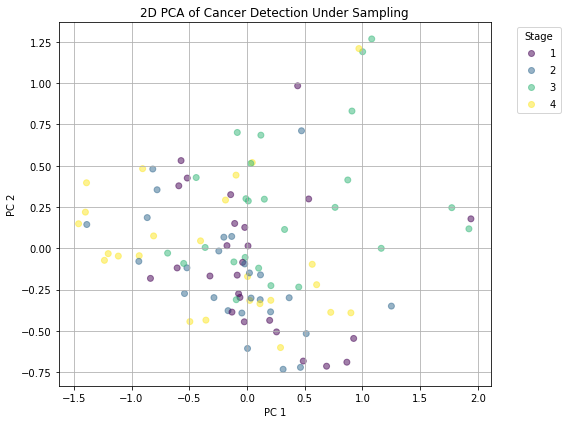

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

df_pca = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
df_pca["Stage"] = y.values


# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=y_train,
    cmap='viridis',        # Try 'Set1', 'tab20', or 'nipy_spectral' for more color variety
    alpha=0.5           # Higher opacity
)
plt.legend(*scatter.legend_elements(), title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D PCA of Cancer Detection Under Sampling")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

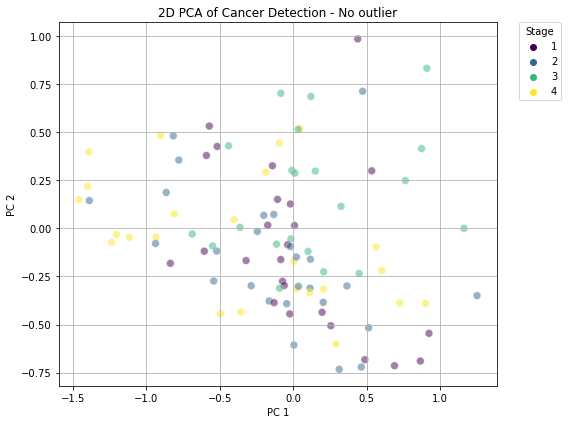

In [25]:
# Drop the Outliers!

df = df_pca
s1 = df_pca[df_pca["PC1"] > 1.5]
df = df.drop(s1.index.tolist())
s2 = df_pca[df_pca["PC2"] > 1]
df = df.drop(s2.index.tolist())


# Step 4: Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Stage",
    palette="viridis",
    alpha=0.5,
    s=60
)
plt.title("2D PCA of Cancer Detection - No outlier")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.legend(title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

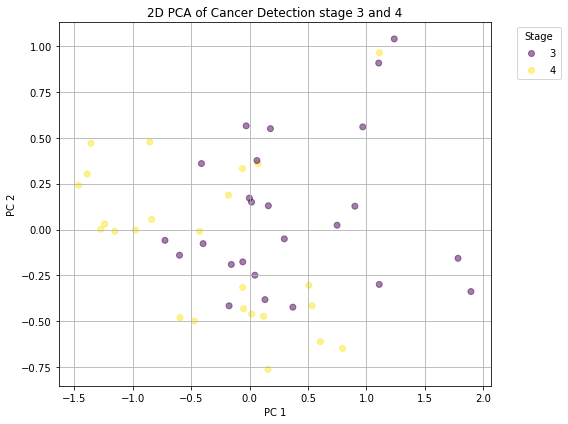

In [26]:
# plot only Stage 3 and 4

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Filter Stage 3 and 4

data = pd.concat([y_train, x_train], axis=1)
df_filtered = data[data['Stage'].isin([3, 4])]
xx = df_filtered.drop(["Stage"], axis = 1)
yy = df_filtered[['Stage']]


# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(xx)

df_pca = pd.DataFrame(x_pca, columns=["PC1", "PC2"])
df_pca["Stage"] = yy.values


# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=yy["Stage"],
    cmap='viridis',        # Try 'Set1', 'tab20', or 'nipy_spectral' for more color variety
    alpha=0.5           # Higher opacity
)
plt.legend(*scatter.legend_elements(), title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("2D PCA of Cancer Detection stage 3 and 4")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()

In [ ]:
x_train

In [ ]:
x_test

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(estimator=model, method='isotonic', cv=5)
calibrated_model.fit(x_train, y_train)


# Predict on test set
y_pred = calibrated_model.predict(x_test)

# Evaluate
print("calibrated Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


calibrated Classifier
--------------------------
Accuracy: 0.6153846153846154
Confusion Matrix:
 [[4 0 1 1]
 [2 4 0 0]
 [0 0 6 1]
 [0 1 4 2]]
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.67      0.67         6
           2       0.80      0.67      0.73         6
           3       0.55      0.86      0.67         7
           4       0.50      0.29      0.36         7

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.62      0.62      0.60        26



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



# Create and train the model
lg_model = LogisticRegression(class_weight='balanced', penalty='l2', solver='liblinear', max_iter=1000)
lg_model.fit(x_train, y_train)

# Predict on test set
y_pred = lg_model.predict(x_test)

# Evaluate
print("Logistic Regression\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
--------------------------
Accuracy: 0.38461538461538464
Confusion Matrix:
 [[3 1 2 0]
 [1 2 2 1]
 [1 1 5 0]
 [2 1 4 0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.43      0.50      0.46         6
           2       0.40      0.33      0.36         6
           3       0.38      0.71      0.50         7
           4       0.00      0.00      0.00         7

    accuracy                           0.38        26
   macro avg       0.30      0.39      0.33        26
weighted avg       0.29      0.38      0.33        26



XGBoost Classifier
--------------------------
Accuracy: 0.4230769230769231
Confusion Matrix:
 [[1 3 2 0]
 [2 3 1 0]
 [2 0 4 1]
 [0 0 4 3]]
Classification Report:
               precision    recall  f1-score   support

           1       0.20      0.17      0.18         6
           2       0.50      0.50      0.50         6
           3       0.36      0.57      0.44         7
           4       0.75      0.43      0.55         7

    accuracy                           0.42        26
   macro avg       0.45      0.42      0.42        26
weighted avg       0.46      0.42      0.42        26



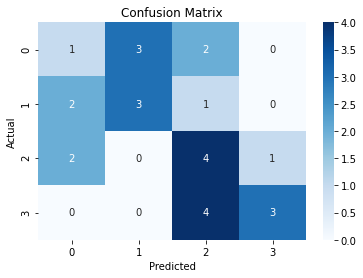

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode labels to 0-based indices
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(le.classes_), 
    eval_metric="mlogloss",
    random_state=42
)
xgb_model.fit(x_train, y_encoded)

# Predict on test set
y_pred_encoded = xgb_model.predict(x_test)
y_pred = le.inverse_transform(y_pred_encoded) 

# Evaluate performance
print("XGBoost Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))


import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [32]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(x_train, y_train)

# Predict on test set
y_pred = RF_model.predict(x_test)

# Evaluate performance
print("Random Forest Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classifier
--------------------------
Accuracy: 0.4230769230769231
Confusion Matrix:
 [[2 1 3 0]
 [4 2 0 0]
 [0 0 6 1]
 [0 1 5 1]]
Classification Report:
               precision    recall  f1-score   support

           1       0.33      0.33      0.33         6
           2       0.50      0.33      0.40         6
           3       0.43      0.86      0.57         7
           4       0.50      0.14      0.22         7

    accuracy                           0.42        26
   macro avg       0.44      0.42      0.38        26
weighted avg       0.44      0.42      0.38        26



In [33]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(
    hidden_layer_sizes=(256, 64, 32),
    activation='identity',
    solver='lbfgs',
    early_stopping=True,
    max_iter=2000,
    random_state=19
)

MLP_model.fit(x_train, y_train)

# Predict on test set
y_pred = MLP_model.predict(x_test)

# Evaluate performance
print("MLP Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


MLP Classifier
--------------------------
Accuracy: 0.23076923076923078
Confusion Matrix:
 [[2 2 0 2]
 [1 1 1 3]
 [3 2 2 0]
 [1 4 1 1]]
Classification Report:
               precision    recall  f1-score   support

           1       0.29      0.33      0.31         6
           2       0.11      0.17      0.13         6
           3       0.50      0.29      0.36         7
           4       0.17      0.14      0.15         7

    accuracy                           0.23        26
   macro avg       0.27      0.23      0.24        26
weighted avg       0.27      0.23      0.24        26



C:\Users\aisa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
# from sklearn.ensemble import VotingClassifier

# voting_clf = VotingClassifier(
#     estimators=[('xgb', xgb_model),('rf', RF_model),('mlp', MLP_model)],
#     voting='soft'
# )

# voting_clf.fit(x_train, y_train)

# # Predict on test set
# y_pred = voting_clf.predict(x_test)

# # Evaluate performance
# print("Voting Classifier\n--------------------------")
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
